# 1. Is Your Nearest Neighbor Close to You in High-Dimensional Space?

**1.1 Acknowledgement for Academic Integrity**

This part is to specify the list of functions that do not exist in the recitation notebooks and are found from the NumPy documentation:

• numpy.random.randn: Returns a sample from the standard normal distribution. Used for "Data Generation" part. [Source: [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)]

• np.linalg.norm: Matrix or vector norm. Used for calculating the Euclidian distance in parts "Average Distance of a Selected Point" and "Minimum Distance of a Selected Point". [Source: [np.linalg.norm](https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/)]

**1.2 Code:**

In [1]:
# Import the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data Generation
def random_points(num_points, num_dimensions):
  # Generates numbers from a standard Normal distribution, num_points random
  # points in a num_dimensions dimensional space.
  return np.random.randn(num_points, num_dimensions)

# Average Distance of a Selected Point
def average_distance_sp(points, selected_point):
  # Calculates the average distance of the selected point to all other points
  # in points.
  distances = [np.linalg.norm(selected_point - point) for point in points
               if not (point==selected_point).all()]
  return np.average(distances)

# Minimum Distance of a Selected Point
def minimum_distance_sp(points, selected_point):
  # Calculates the minimum distance of the selected point and to all the other
  # points in points.
  distances = [np.linalg.norm(selected_point - point) for point in points
               if not (point==selected_point).all()]
  return np.min(distances)

# Closest-to-Average Ratio
def closest_to_average_ratio(min_dist, avg_dist):
  # Calculates the ratio of the closest distance to the average distance.
  return min_dist/avg_dist

# Selection of Random Points
def select_random_points(arr, num_selection):
  indices = np.random.choice(arr.shape[0], 100, replace=False)
  return arr[indices]

# For calculating the pairwise distance between the points of a specific
# dimension.
def pairwise_distances(points):
    num_points = len(points)
    distances = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distances[i, j] = np.linalg.norm(points[i] - points[j])
            distances[j, i] = distances[i, j]
    return distances

In [3]:
# Creating a DataFrame object to view the dimensions, selected points and
# corresponding statistical values in a more neat way.
df_analysis = pd.DataFrame({"Dimension":[i+1 for i in range(100)],
                            "All Points":[random_points(1000, i+1) for i in range(100)],
                            })
df_analysis["Chosen Points"] = [select_random_points(df_analysis['All Points'][i],
                                                     100) for i in range(100)]
df_analysis["Minimum Distances"] = df_analysis.apply(lambda row: [minimum_distance_sp(row["All Points"], point)
                                                                  for point in row["Chosen Points"]], axis=1)
df_analysis["Average Distances"] = df_analysis.apply(lambda row: [average_distance_sp(row["All Points"], point)
                                                                  for point in row["Chosen Points"]], axis=1)
df_analysis["Closest-to-Average Ratio"] = df_analysis.apply(lambda row: [row["Minimum Distances"][i] /
                                                                         row["Average Distances"][i]
                                                                         for i in range(100)], axis=1)
df_analysis["Mean of Minimum Distances"] = df_analysis.apply(lambda row: np.average(row["Minimum Distances"]),
                                                             axis=1)
df_analysis["Deviation of Minimum Distances"] = df_analysis.apply(lambda row: np.std(row["Minimum Distances"]),
                                                                  axis=1)
df_analysis["Mean of Average Distances"] = df_analysis.apply(lambda row: np.average(row["Average Distances"]),
                                                             axis=1)
df_analysis["Deviation of Average Distances"] = df_analysis.apply(lambda row: np.std(row["Average Distances"]),
                                                                  axis=1)
df_analysis["Mean of Ratio"] = df_analysis.apply(lambda row: np.average(row["Closest-to-Average Ratio"]),
                                                 axis=1)
df_analysis["Deviation of Ratio"] = df_analysis.apply(lambda row: np.std(row["Closest-to-Average Ratio"]),
                                                      axis=1)
df_analysis

,Dimension,All Points,Chosen Points,Minimum Distances,Average Distances,Closest-to-Average Ratio,Mean of Minimum Distances,Deviation of Minimum Distances,Mean of Average Distances,Deviation of Average Distances,Mean of Ratio,Deviation of Ratio
0,1,"[[-0.4364606089337829], [0.03904684656579721],...","[[-1.2550232542759587], [-0.5690504400359576],...","[0.0006326629656461247, 0.0009441399885070645,...","[1.3508591084330488, 0.9285653340522075, 0.938...","[0.0004683411924282707, 0.0010167728148830304,...",0.002861,0.006430,1.156481,0.430238,0.001993,0.002540
1,2,"[[1.3539644693889574, -0.3078617530581355], [-...","[[-1.319645317236979, -0.10743159419000545], [...","[0.09498583491999892, 0.050860640330113435, 0....","[1.7345597886222826, 1.8706460960666373, 1.821...","[0.054760773046309226, 0.027188809490505384, 0...",0.083168,0.097199,1.757438,0.468494,0.042209,0.031809
2,3,"[[0.7470811781923158, -0.414149322366538, -1.8...","[[-0.6418092527046023, 2.1156798072706597, -0....","[0.2271473909653004, 0.1292949443466973, 0.554...","[2.7232890796773352, 2.344225847086587, 3.2233...","[0.083409210083644, 0.055154644979017516, 0.17...",0.268595,0.183004,2.230432,0.497280,0.114215,0.049074
3,4,"[[0.4775015618291007, 1.727042752995902, 0.048...","[[1.2040739805163385, -0.03902911076707658, 0....","[0.31106385015736393, 0.22397521960304567, 0.2...","[2.3628265449654866, 2.136317428885987, 1.9672...","[0.13164904161930668, 0.10484173212023117, 0.1...",0.451033,0.252749,2.622725,0.445197,0.165963,0.062205
4,5,"[[-1.5543795895733232, -0.44642422892346856, 1...","[[-0.37979293367169714, 0.17285264158644997, 1...","[0.3941135454311409, 0.8376186801458244, 0.273...","[2.601900986667475, 3.016188546833455, 2.31427...","[0.15147138474931865, 0.27770766553211607, 0.1...",0.709400,0.278897,2.993172,0.473840,0.232146,0.064299
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"[[-1.5376625625014138, 2.0967378273334547, 0.9...","[[0.06372648972674527, 1.5853070294359475, -0....","[11.051801605041774, 11.004502681822661, 10.97...","[13.740293580893123, 13.422254865730704, 13.96...","[0.8043351868703961, 0.8198698945822452, 0.785...",11.048977,0.569090,13.775516,0.527616,0.801835,0.018803
96,97,"[[1.0359352877778432, -0.02374042592107904, 0....","[[0.5395385611368451, 0.6997692278699663, 1.31...","[10.41500748150032, 10.705524128860473, 11.128...","[13.395507871058971, 13.507723182984062, 14.63...","[0.7775000083424959, 0.7925483801997384, 0.760...",11.120211,0.539555,13.889850,0.505880,0.800475,0.021292
97,98,"[[-1.6059904177832256, 0.3754052170834644, -0....","[[1.0577876774228148, 1.224695717260585, -0.95...","[10.888493336996198, 10.748764792866766, 11.46...","[13.798288103079885, 14.09137678614387, 13.881...","[0.7891191469299588, 0.7627902479647046, 0.825...",11.244466,0.577321,14.012676,0.541691,0.802222,0.019203
98,99,"[[1.4351419141707369, 0.18644127538066674, 1.9...","[[0.504661352382966, -0.2543241131831033, 0.46...","[10.987389263260836, 11.924071044840062, 11.06...","[13.526154012677479, 14.666081986940336, 13.53...","[0.8123069760231054, 0.8130372553118178, 0.817...",11.231506,0.538622,13.978494,0.500721,0.803349,0.020659


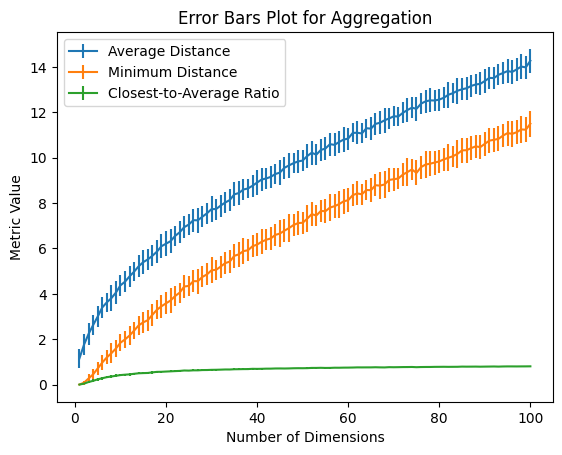

In [22]:
# Aggregating the results and plotting the error bar.
plt.errorbar(df_analysis["Dimension"], df_analysis["Mean of Average Distances"],
             yerr=df_analysis["Deviation of Average Distances"], label="Average Distance")
plt.errorbar(df_analysis["Dimension"], df_analysis["Mean of Minimum Distances"],
             yerr=df_analysis["Deviation of Minimum Distances"], label="Minimum Distance")
plt.errorbar(df_analysis["Dimension"], df_analysis["Mean of Ratio"],
             yerr=df_analysis["Deviation of Ratio"], label="Closest-to-Average Ratio")
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Error Bars Plot for Aggregation')
plt.legend()
plt.show()

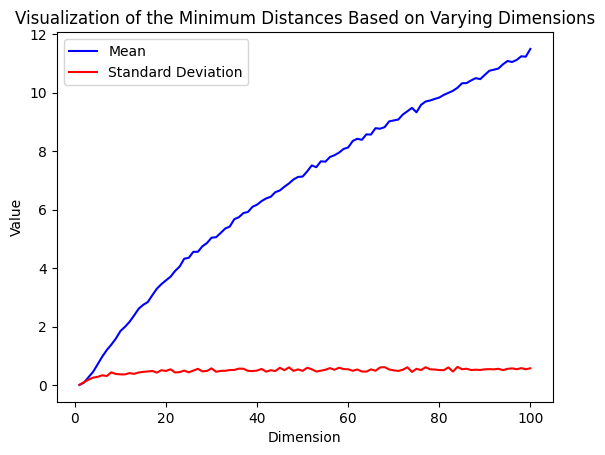

In [5]:
# Visualization of the Minimum Distances Based on Varying Dimensions
plt.figure()
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Minimum Distances'],
         "b", label="Mean")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Minimum Distances'],
         "r", label="Standard Deviation")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.title("Visualization of the Minimum Distances Based on Varying Dimensions")
plt.show()

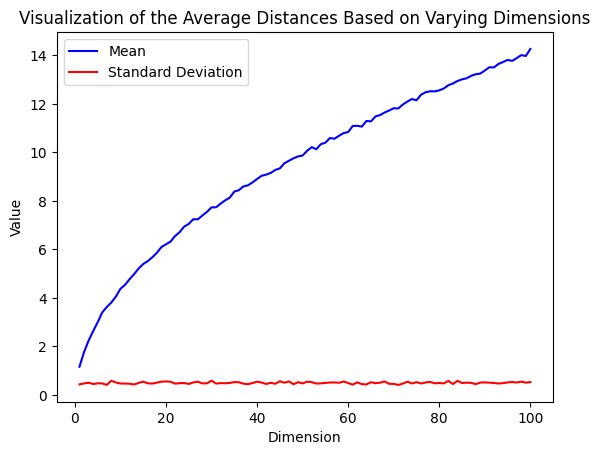

In [6]:
# Visualization of the Average Distances Based on Varying Dimensions
plt.figure()
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Average Distances'],
         "b", label="Mean")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Average Distances'],
         "r", label="Standard Deviation")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.title("Visualization of the Average Distances Based on Varying Dimensions")
plt.show()

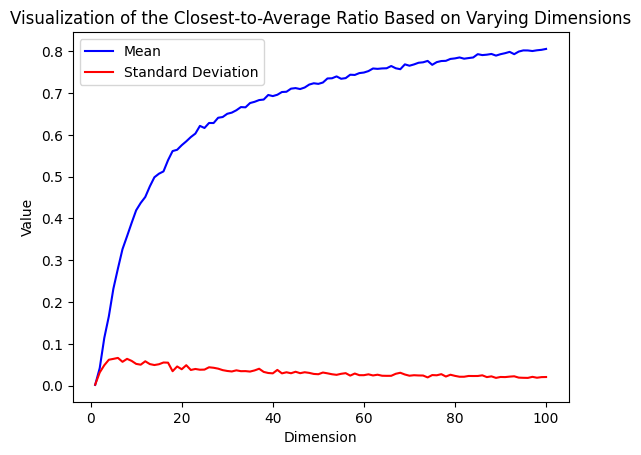

In [7]:
# Visualization of the Closest-to-Average Ratio Based on Varying Dimensions
plt.figure()
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Ratio'],
         "b", label="Mean")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Ratio'],
         "r", label="Standard Deviation")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.title("Visualization of the Closest-to-Average Ratio Based on Varying Dimensions")
plt.show()

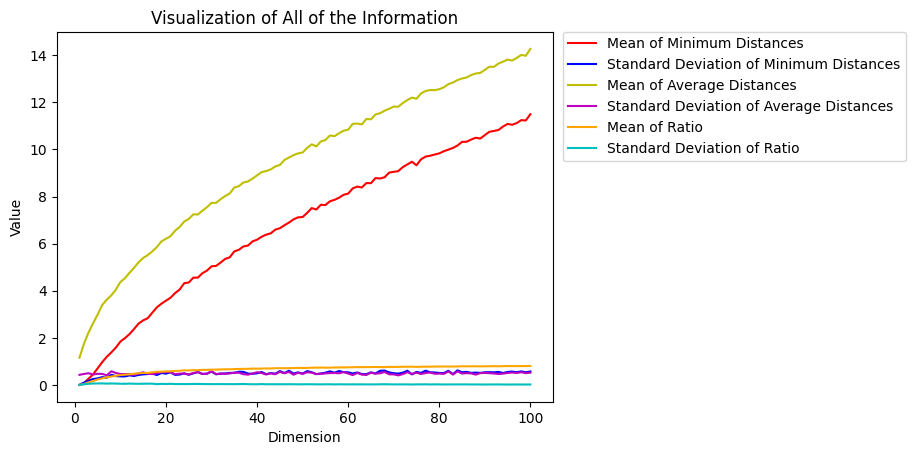

In [8]:
# Combining all of the plots into a single plot:
plt.figure()
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Minimum Distances'],
         "r", label="Mean of Minimum Distances")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Minimum Distances'],
         "b", label="Standard Deviation of Minimum Distances")
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Average Distances'],
         "y", label="Mean of Average Distances")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Average Distances'],
         "m", label="Standard Deviation of Average Distances")
plt.plot(df_analysis["Dimension"], df_analysis['Mean of Ratio'],
         "orange", label="Mean of Ratio")
plt.plot(df_analysis["Dimension"], df_analysis['Deviation of Ratio'],
         "c", label="Standard Deviation of Ratio")
plt.legend(loc=(1.02, 0.65))
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.title("Visualization of All of the Information")
plt.show()

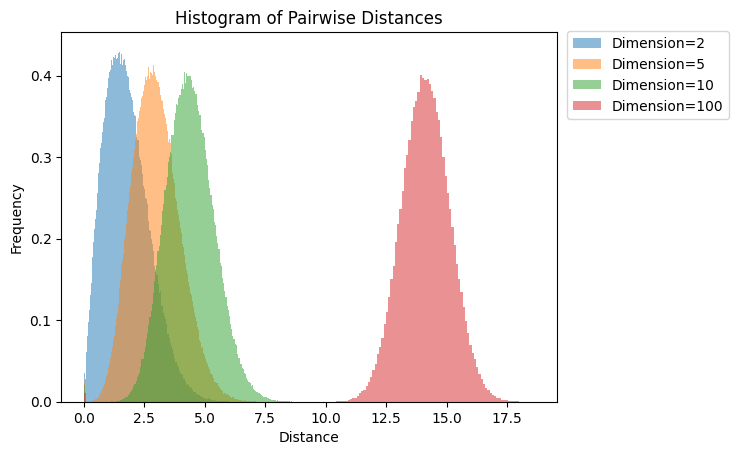

In [9]:
# Plot a histogram of all pairwise distances for cases where d is 2, 5, 10, and
# 100 dimensions.
dimensions = [2, 5, 10, 100]
plt.figure()
for dimension in dimensions:
  points = df_analysis["All Points"][dimension-1]
  distances = pairwise_distances(points)
  plt.hist(distances.flatten(), bins=200, alpha=0.5, density=True)
plt.title("Histogram of Pairwise Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend(["Dimension=2", "Dimension=5", "Dimension=10", "Dimension=100"],
           loc=(1.02, 0.765))
plt.show()

**1.3. The Results**

Analyzing the plots, it is possible to indicate that as the dimension of the data increases, the distance between each of the points increases significantly - with a possibly negligible minor standard deviation value. In addition to that, the ratio of Closest-to-Average approaches to 1 - which shows that all
pairs of points are almost equidistant from one another. These outcomes results in several major problems:

1. Since all points are relatively far away from each other, the nearest neighbor of a specific point may not possess the similar characteristics with that point.

2. As the value of the dimension increases, the points of data becomes more sparse. This makes it harder for model to efficiently generalize the data.

3. Due to the increase in the dimensions, the computational cost of kNN also increases.

One possible solution to solve this issue is to apply dimensionality reduction to the data points.

# 2. k-NN Classifier in Action

**2.1. Analysis of the Dataset and Splitting of the Train Set for Validation**

In [10]:
# Import the necessary libraries.
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np

In [11]:
# Load the data.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

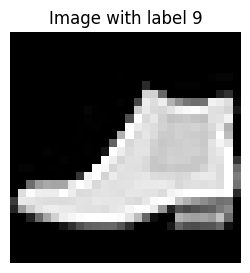

In [12]:
# Visualize the training data.
idx = 24000
image, label = X_train[idx], y_train[idx]
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

In [13]:
# Split %20 of the training data for validation.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


In [14]:
# Analyze the splitted training data.
print(X_train.shape, y_train.shape)
df_classes = pd.DataFrame({"Class":[i for i in range(y_train.min(), y_train.max()+1)],
                           "Sample Count":[(y_train==i).sum() for i in
                                           range(y_train.min(), y_train.max()+1)]})
df_classes

(48000, 28, 28) (48000,)


,Class,Sample Count
0,0,4751
1,1,4805
2,2,4846
3,3,4760
4,4,4812
5,5,4726
6,6,4818
7,7,4866
8,8,4771
9,9,4845


In [15]:
# Analyze the splitted validation data.
print(X_val.shape, y_val.shape)
df_classes = pd.DataFrame({"Class":[i for i in range(y_val.min(), y_val.max()+1)],
                           "Sample Count":[(y_val==i).sum() for i in
                                           range(y_val.min(), y_val.max()+1)]})
df_classes

(12000, 28, 28) (12000,)


,Class,Sample Count
0,0,1249
1,1,1195
2,2,1154
3,3,1240
4,4,1188
5,5,1274
6,6,1182
7,7,1134
8,8,1229
9,9,1155


In [16]:
# Flatten the training, validation and testing data.
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, X_val.shape, X_test.shape)

(48000, 784) (12000, 784) (10000, 784)


**2.2. Finding the Best "k" Value and Creating the Confusion Matrix**

100%|██████████| 9/9 [05:48<00:00, 39.29s/it]

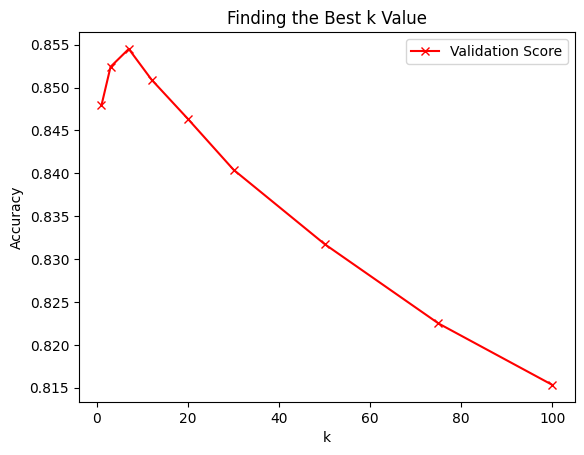

In [17]:
# For each value of "k", analyze the accuracy score and decide on the optimal
# "k" value.
ks = [1, 3, 7, 12, 20, 30, 50, 75, 100]
pbar = tqdm(total=len(ks), position=0, leave=True)
train_scores = []
valid_scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    #train_scores.append(knn.score(X_train, y_train))
    valid_scores.append(knn.score(X_val, y_val))
    pbar.update(1)
plt.figure()
#plt.plot(ks, train_scores, "bs:", label="Training Score")
plt.plot(ks, valid_scores, "rx-", label="Validation Score")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Finding the Best k Value")
plt.show()

In [18]:
# Analyze the validation set accuracy and the optimal "k" value.
optimal_k = ks[np.where(valid_scores == max(valid_scores))[0][0]]
opt_val_acc = valid_scores[np.where(valid_scores == max(valid_scores))[0][0]]
#opt_tr_acc = train_scores[np.where(valid_scores == max(valid_scores))[0][0]]
print("The optimal k value is:", optimal_k)
print("The optimal validation set accuracy is:", opt_val_acc)
#print("The optimal training set accuracy is:", opt_tr_acc)

The optimal k value is: 7
The optimal validation set accuracy is: 0.8545


In [19]:
# Reload the training data and retrain the model using the optimal k value.
# Then, assess its performance on the test set.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
knn = KNN(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
print("The test accuracy is:", knn.score(X_test, y_test))

The test accuracy is: 0.854


In [20]:
# Creating the confusion matrix:
y_predictions = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predictions)
print(conf_mat)

[[857   1  20  17   5   0  92   1   7   0]
 [  8 967   6  12   4   0   2   0   1   0]
 [ 20   2 814  11  78   0  75   0   0   0]
 [ 35   5  16 869  36   0  37   0   2   0]
 [  2   0 122  25 760   0  89   0   2   0]
 [  1   0   0   0   0 806   5 107   1  80]
 [173   0 129  23  74   0 588   0  13   0]
 [  0   0   0   0   0   2   0 957   0  41]
 [  1   1  13   5   7   0  12   7 952   2]
 [  0   0   0   0   0   1   1  28   0 970]]


<Figure size 800x800 with 0 Axes>

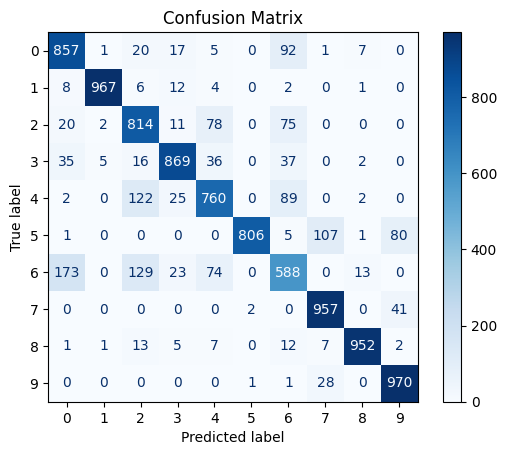

In [21]:
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_predictions,
                                        colorbar=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

2.3. Interpretation of the Results

Question 1: Which class(es) have the highest number of misclassifications?

Answer 1: Class 6 has the highest number of misclassification with a total of approximately 400 misclassification.

Question 2: Are there specific pairs of classes that are commonly mistaken for one another?

Answer 2: Class 6 is commonly mistaken for Class 0 and Class 2. Class 4 is commonly mistaken for Class 2.